In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import datetime as dt

In [2]:
PATH_NOVO = "../Dados/Armarios/"
PATH_ANTIGO = "../Dados/"
FILE = "contagem_faturado_consumo_armarios_por_ano_mes.txt"

In [3]:
armarios_antigo = pd.read_csv(PATH_ANTIGO + 'contagem_faturado_consumo_armarios_por_ano_mes_removido_faturas_problematicas.txt', sep = '\t')
armarios_novo = pd.read_csv(PATH_NOVO + FILE, sep = '\t')

In [4]:
armarios_novo

,contagem,custo,consumo,mes
0,4314,4267820.58,6186296.14,201701
1,4434,4275985.94,6161882.53,201702
2,4600,4823462.26,6739253.51,201703
3,4520,4524682.78,6407286.19,201704
4,4640,4703198.48,6670193.32,201705
...,...,...,...,...
60,4137,3710423.69,4308720.16,202201
61,4122,4179147.39,4092172.18,202202
62,4098,4374301.34,4266572.49,202203
63,3985,3843716.57,3915388.49,202204


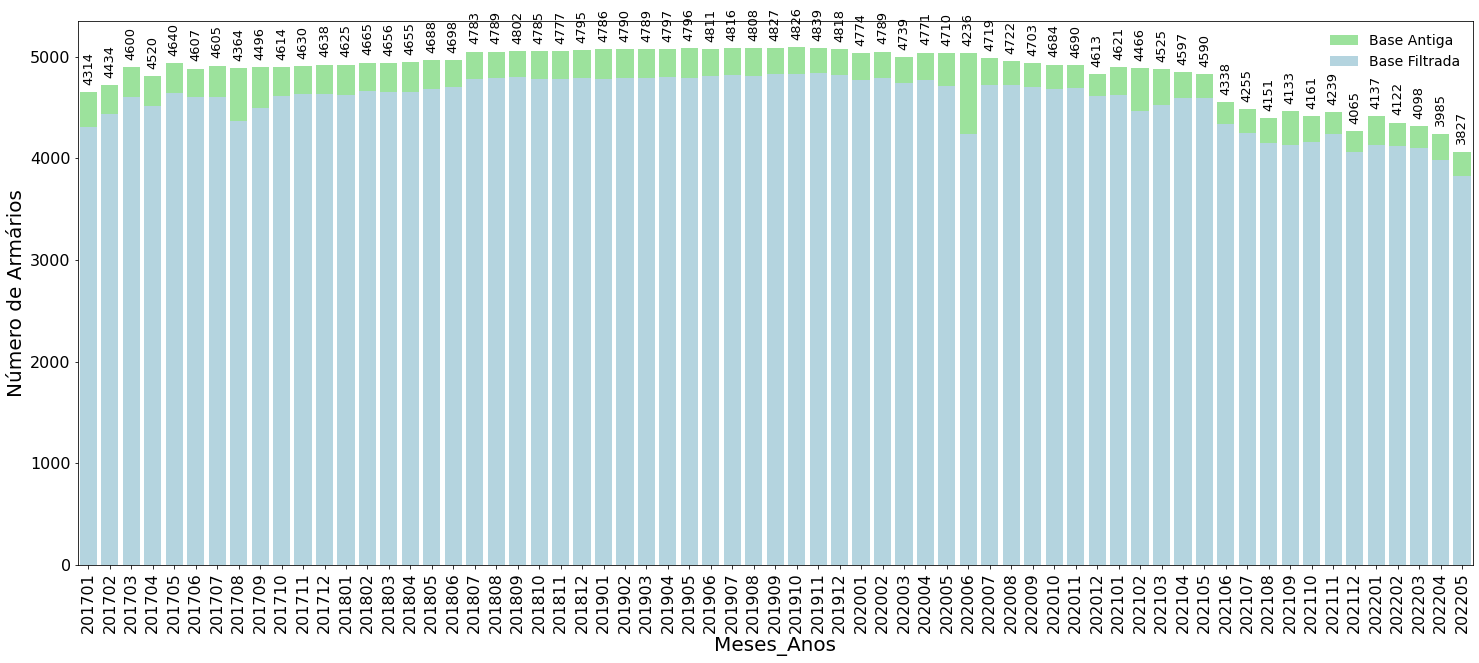

In [73]:
plt.figure(figsize=(25, 10))

ax = sns.barplot(x = 'mes', y = 'contagem', data = armarios_antigo, color='#90ee90', label = 'Base Antiga')  

ax = sns.barplot(x = 'mes', y = 'contagem', data = armarios_novo, color='#add8e6', label = 'Base Filtrada')

for i, r in (armarios_novo[['mes', 'contagem']].groupby('mes').sum().reset_index(drop=False)).iterrows():
    ax.text(i, ax.patches[i].get_height() + 100, '{:.0f}'.format(r['contagem']), rotation = 90, fontsize = 13, horizontalalignment = 'center')

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

  
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1, fontsize = 14)
leg.get_frame().set_alpha(0.5)

plt.show()

In [42]:
armarios_antigo['consumo'] = armarios_antigo['consumo']/1000000
armarios_novo['consumo'] = armarios_novo['consumo']/1000000

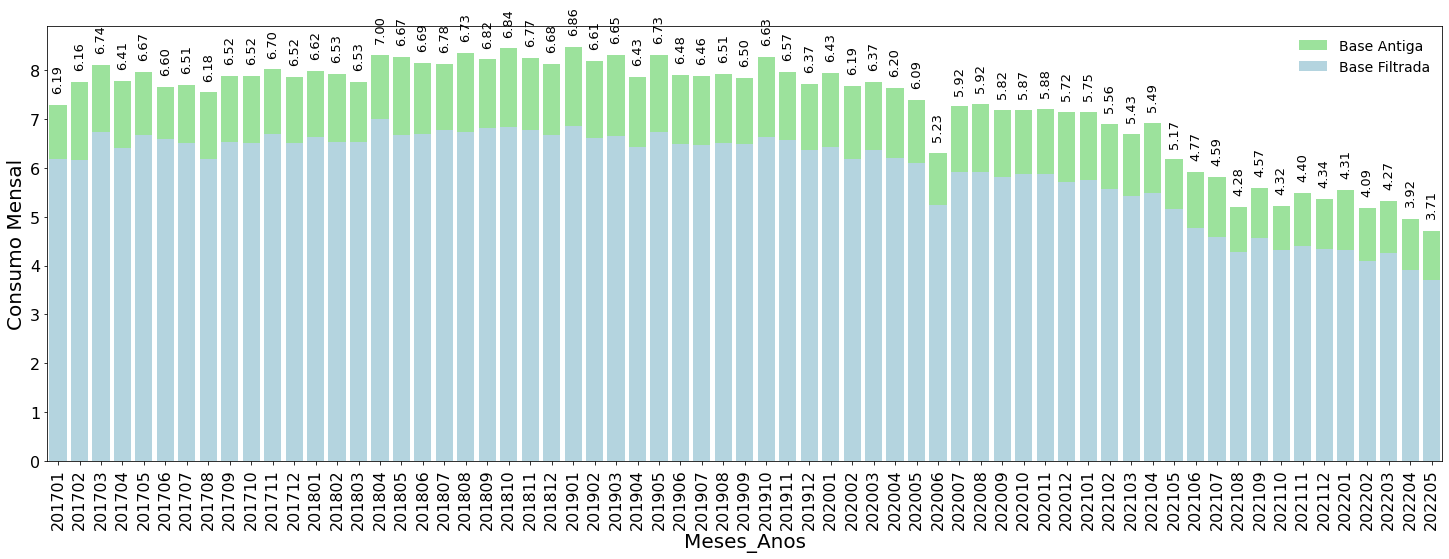

In [71]:
plt.figure(figsize=(25, 8))

ax = sns.barplot(x = 'mes', y = 'consumo', data = armarios_antigo, color='#90ee90', label = 'Base Antiga')  

ax = sns.barplot(x = 'mes', y = 'consumo', data = armarios_novo, color='#add8e6', label = 'Base Filtrada')

for i, r in (armarios_novo[['mes', 'consumo']].groupby('mes').sum().reset_index(drop=False)).iterrows():
    ax.text(i, ax.patches[i].get_height()+0.3, '{:.2f}'.format(r['consumo']), rotation = 90, fontsize = 13, horizontalalignment = 'center')

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

  
ax.set(xlabel='Meses_Anos', ylabel='Consumo Mensal')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1, fontsize = 14)
leg.get_frame().set_alpha(0.5)

plt.show()

In [47]:
media = pd.DataFrame()
media['saldo'] = armarios_antigo['contagem'] - armarios_novo['contagem']
media['saldo_consumo'] = armarios_antigo['consumo'] - armarios_novo['consumo']
media['mes'] = armarios_novo['mes']
media

,saldo,saldo_consumo,mes
0,335,1.095882,201701
1,291,1.597621,201702
2,303,1.370529,201703
3,288,1.377031,201704
4,297,1.284847,201705
...,...,...,...
60,276,1.232112,202201
61,231,1.087751,202202
62,224,1.051983,202203
63,251,1.040821,202204


In [66]:
media.sort_values('saldo')

,saldo,mes
59,205,202112
53,219,202106
47,221,202012
58,221,202111
62,224,202203
...,...,...
50,353,202103
8,401,201709
49,421,202102
7,524,201708


In [49]:
media.sort_values('saldo_consumo')

,saldo,saldo_consumo,mes
57,254,0.892480,202110
55,248,0.923735,202108
64,233,0.993425,202205
52,241,1.008167,202105
59,205,1.024683,202112
...,...,...,...
21,272,1.602866,201810
24,291,1.619015,201901
19,262,1.619613,201808
33,267,1.650179,201910


In [54]:
media['saldo'].mean()

285.61538461538464

In [50]:
media['saldo_consumo'].mean()

1.3272534504615385

In [51]:
media['saldo'].median()

272.0

In [52]:
media['saldo_consumo'].median()

1.3585872699999992

In [42]:
media['saldo'].min()

saldo    205
dtype: int64

In [53]:
media['saldo_consumo'].min()

0.8924798999999997

In [43]:
media['saldo'].max()

saldo    799
dtype: int64

In [54]:
media['saldo_consumo'].max()

1.6579140100000007

In [44]:
media.std()

saldo    81.291276
dtype: float64

In [38]:
df =pd.read_csv(PATH_NOVO + 'consumo_macroregioes_novo.txt', sep = '\t')
df['mes'] = df['mes'].astype('string')
df

,contagem,mes,macroregiao,consumo,custo
0,717,201701,CO,979926.39,679924.46
1,442,201701,NE,651819.30,480234.46
2,1621,201701,S,2578865.00,1736961.80
3,1534,201701,SE,1975685.45,1370699.86
4,726,201702,CO,933461.28,652974.70
...,...,...,...,...,...
318,714,202201,CO,272766.51,625667.06
319,704,202202,CO,314179.48,584545.91
320,682,202203,CO,317803.38,574834.71
321,644,202204,CO,259440.82,517003.54


In [39]:
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df = df.sort_values('mes')

In [34]:
df

,contagem,mes,macroregiao,consumo,custo
0,717,2017-01-01,CO,979926.39,679924.46
1,442,2017-01-01,NE,651819.30,480234.46
2,1621,2017-01-01,S,2578865.00,1736961.80
3,1534,2017-01-01,SE,1975685.45,1370699.86
4,726,2017-02-01,CO,933461.28,652974.70
...,...,...,...,...,...
308,1563,2022-05-01,S,1542652.84,1322533.63
307,497,2022-05-01,NE,571878.00,656417.78
306,1,2022-05-01,N,1776.00,2063.19
309,1390,2022-05-01,SE,1351674.60,924194.85


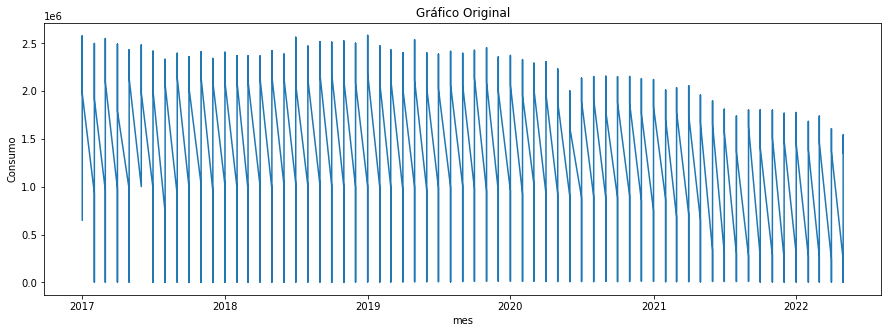

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('mes')
ax1.set_ylabel('Consumo')
ax1.set_title('Gráfico Original')
ax1.plot('mes', 'consumo', data = df);

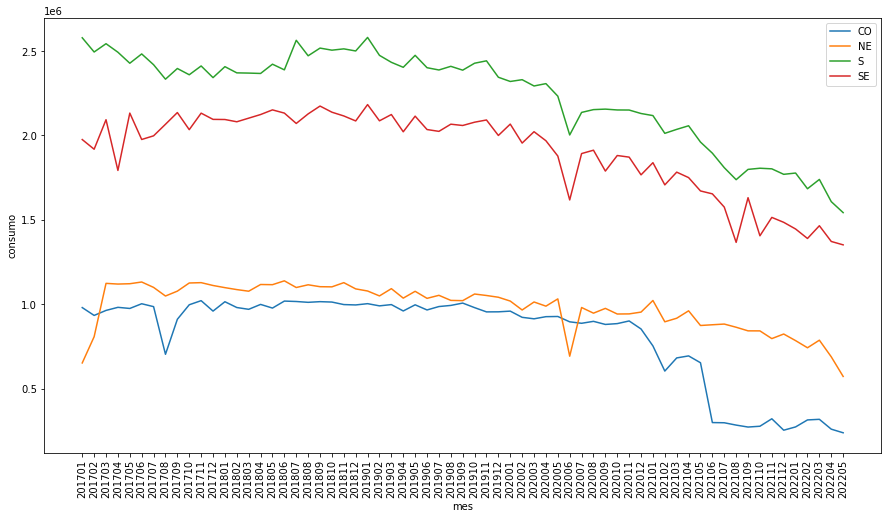

In [40]:
fig = plt.figure(figsize=(15,8))

sns.lineplot(data=df.loc[df['macroregiao']!='N'], x=df['mes'].dt.strftime('%Y%m'), y="consumo", hue='macroregiao')
plt.xticks(rotation=90)

#plt.show()
leg = plt.legend()

In [41]:
teste = pd.DataFrame(df.groupby('mes')['consumo'].sum())
teste.reset_index(inplace=True)
teste.columns
teste

,mes,consumo
0,2017-01-01,6186296.14
1,2017-02-01,6157388.53
2,2017-03-01,6727594.51
3,2017-04-01,6390503.19
4,2017-05-01,6659854.32
...,...,...
60,2022-01-01,4284148.67
61,2022-02-01,4133663.09
62,2022-03-01,4313287.09
63,2022-04-01,3931668.31


No handles with labels found to put in legend.


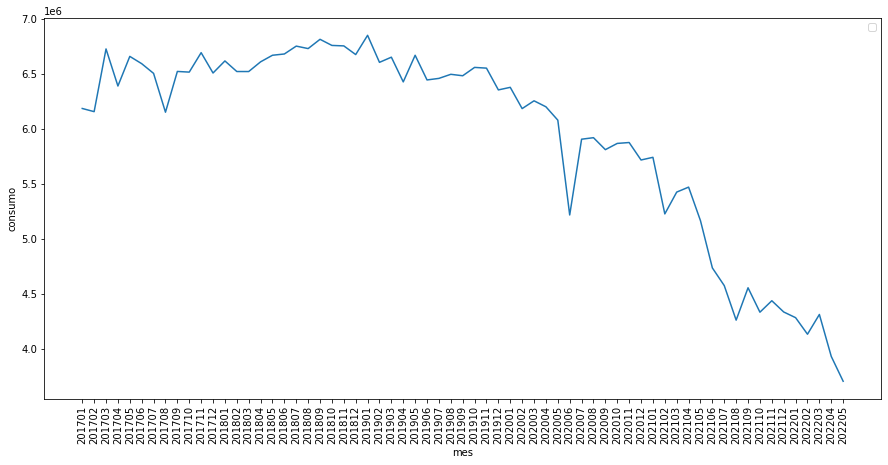

In [42]:
fig = plt.figure(figsize=(15,7))

sns.lineplot(data=teste, x=teste['mes'].dt.strftime('%Y%m'), y="consumo")
plt.xticks(rotation=90)

#plt.show()
leg = plt.legend()

In [7]:
teste = pd.DataFrame(df.loc[df['macroregiao'] != 'CO'].groupby('mes')['consumo'].sum())
teste.reset_index()
teste.columns
teste

,consumo
mes,
2017-01-01,5206369.75
2017-02-01,5228421.25
2017-03-01,5775689.85
2017-04-01,5425007.63
2017-05-01,5694932.80
...,...
2022-01-01,4012128.16
2022-02-01,3819483.61
2022-03-01,3995483.71


No handles with labels found to put in legend.


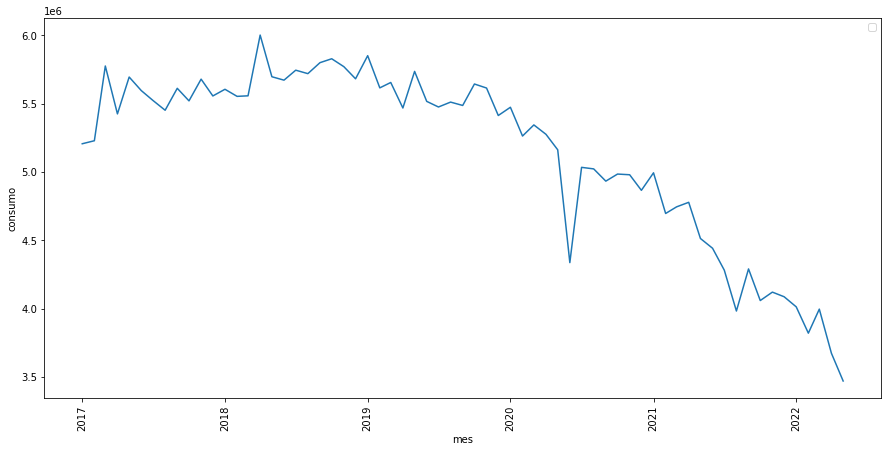

In [8]:
fig = plt.figure(figsize=(15,7))

sns.lineplot(data=teste, x=teste.index, y="consumo")
plt.xticks(rotation=90)

#plt.show()
leg = plt.legend()

In [10]:
teste = pd.DataFrame(df.loc[(df['macroregiao'] != 'CO') & (df['macroregiao'] != 'NE')].groupby('mes')['consumo'].sum())
teste.reset_index()
teste.columns
teste

,consumo
mes,
2017-01-01,4554550.45
2017-02-01,4421087.64
2017-03-01,4650115.00
2017-04-01,4290152.74
2017-05-01,4570340.30
...,...
2022-01-01,3227260.16
2022-02-01,3077634.61
2022-03-01,3208755.71


No handles with labels found to put in legend.


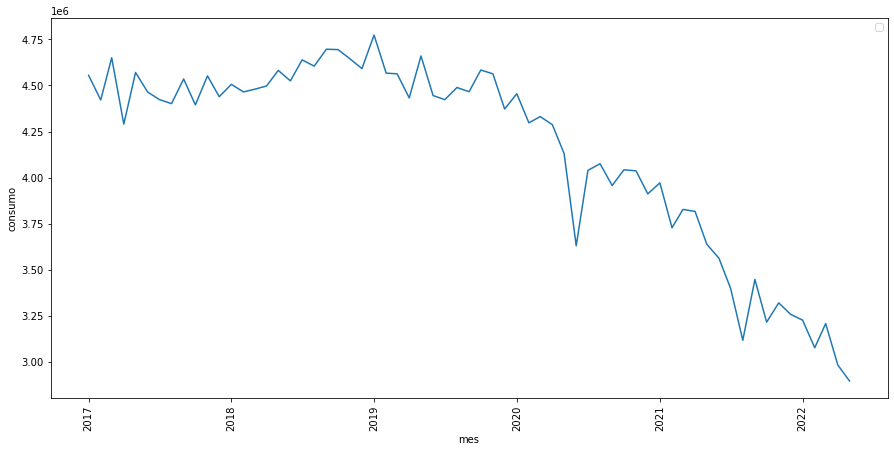

In [11]:
fig = plt.figure(figsize=(15,7))

sns.lineplot(data=teste, x=teste.index, y="consumo")
plt.xticks(rotation=90)

#plt.show()
leg = plt.legend()

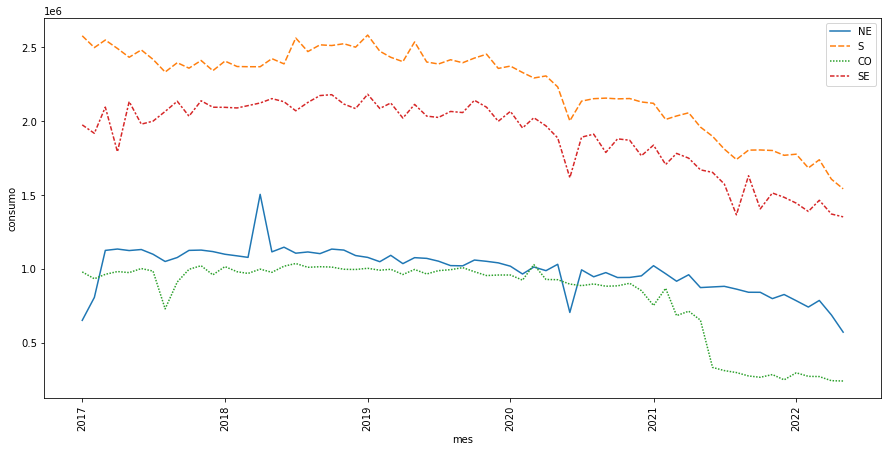

In [69]:
fig = plt.figure(figsize=(15,7))

sns.lineplot(data=df.loc[df['macroregiao'] != 'N'], x='mes', y="consumo", hue = 'macroregiao', style='macroregiao')
plt.xticks(rotation=90)

#plt.show()
leg = plt.legend()

In [65]:
df2 =pd.read_csv(PATH_ANTIGO + 'consumo_macroregioes_removido_faturas_problematicas.txt', sep = '\t')
df2['mes'] = df2['mes'].astype('string')
df2['mes'] = df2['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df2

,consumo,mes,macroregiao
0,704764.83,2017-01-01,NE
1,3111179.00,2017-01-01,S
2,1123905.39,2017-01-01,CO
3,36595.00,2017-01-01,N
4,2308324.93,2017-01-01,SE
...,...,...,...
320,349541.42,2022-05-01,CO
321,1876.00,2022-05-01,N
322,2211739.24,2022-05-01,S
323,616932.90,2022-05-01,NE


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

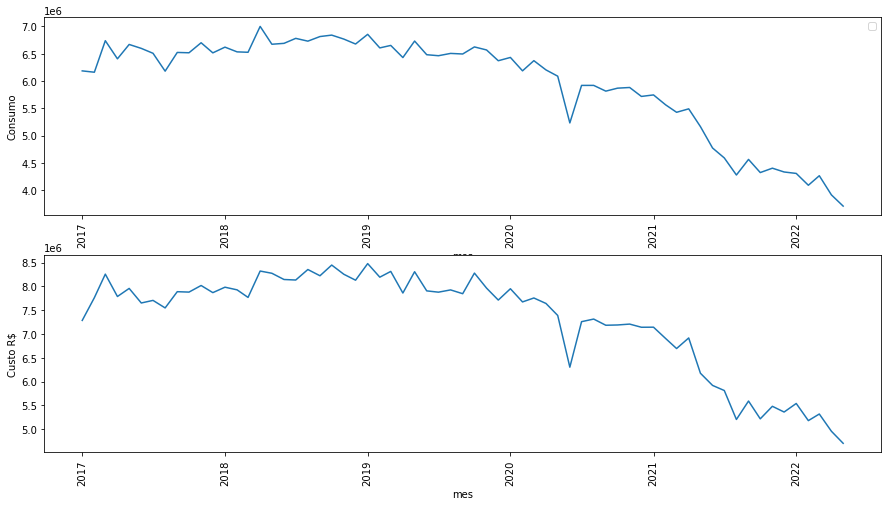

In [66]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

teste = pd.DataFrame(df.groupby('mes')['consumo'].sum())
plot = plt.subplot(2, 1, 1)
sns.lineplot(data=teste, x=teste.index, y="consumo")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel("Consumo")

ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
teste2 = pd.DataFrame(df2.groupby('mes')['consumo'].sum())
sns.lineplot(data=teste2, x=teste2.index, y="consumo")
plt.xticks(rotation=90)
plt.ylabel("Custo R$")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [61]:
teste2 = pd.DataFrame(df2.groupby('mes')['consumo'].sum())

In [62]:
teste2

,consumo
mes,
2017-01-01,7284769.15
2017-02-01,7761918.52
2017-03-01,9639207.40
2017-04-01,7786587.72
2017-05-01,12690749.42
...,...
2022-01-01,5541484.49
2022-02-01,5181438.60
2022-03-01,5320201.17


In [63]:
teste

,consumo
mes,
2017-01-01,6186296.14
2017-02-01,6161882.53
2017-03-01,6739253.51
2017-04-01,6407286.19
2017-05-01,6670193.32
...,...
2022-01-01,4308720.16
2022-02-01,4092172.18
2022-03-01,4266572.49


In [67]:
df = pd.read_csv(PATH_NOVO + 'metade_outliers.txt', sep = '\t')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

,contagem,mes,uf,macroregiao,consumototal,valortotal
0,18,2017-01-01,DF,CO,26501.00,19917.16
1,2,2017-01-01,GO,CO,4070.00,2704.70
2,1,2017-01-01,MS,CO,88046.00,48819.48
3,2,2017-01-01,RO,N,19444.00,10325.17
4,1,2017-01-01,TO,N,17151.00,11932.48
...,...,...,...,...,...,...
1263,32,2022-05-01,SC,S,86236.00,67577.95
1264,4,2022-05-01,ES,SE,31095.00,28511.29
1265,18,2022-05-01,MG,SE,33860.00,6474.39
1266,11,2022-05-01,RJ,SE,40222.00,51109.99


In [68]:
group = pd.DataFrame(df.groupby('mes')['contagem'].sum())
group.reset_index(inplace=True)
group['mes']

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
        ...    
60   2022-01-01
61   2022-02-01
62   2022-03-01
63   2022-04-01
64   2022-05-01
Name: mes, Length: 65, dtype: datetime64[ns]

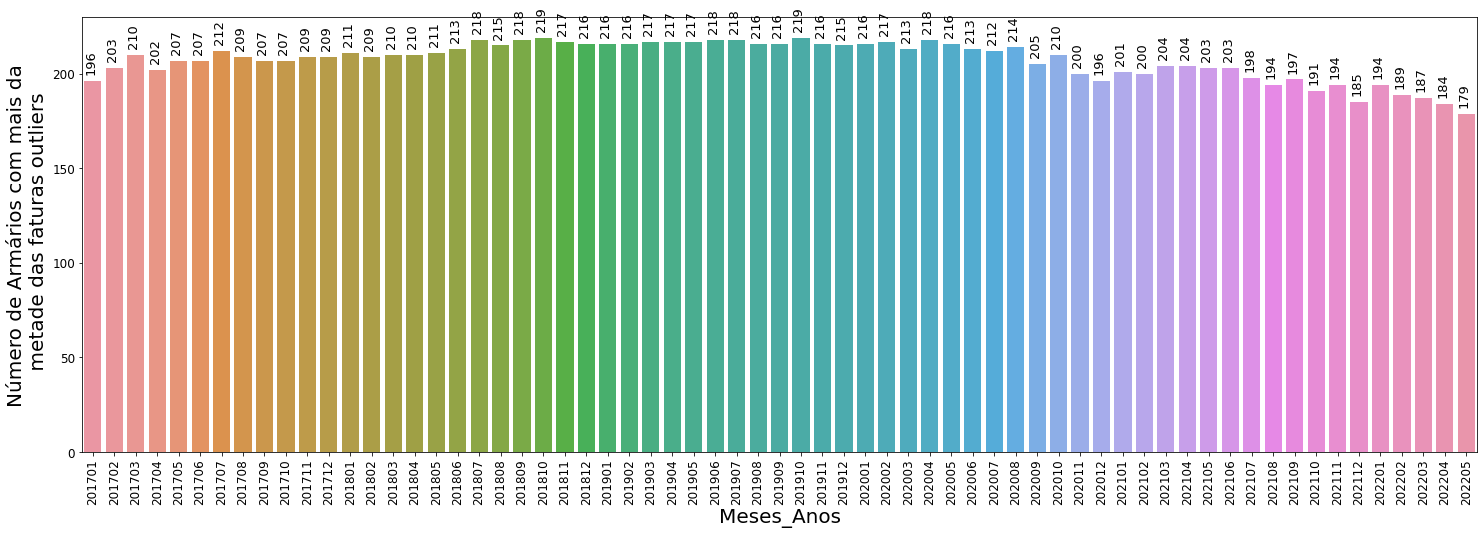

In [69]:
plt.figure(figsize=(25, 8))

ax = sns.barplot(x = group['mes'].dt.strftime('%Y%m'), y = 'contagem', data = group)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+5), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários com mais da\n metade das faturas outliers')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

<Figure size 432x288 with 0 Axes>

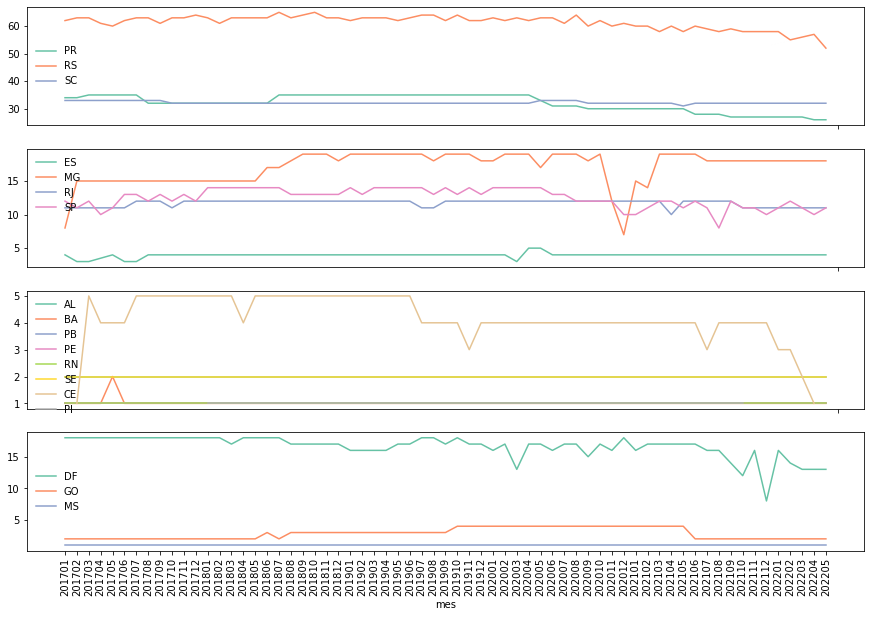

In [49]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

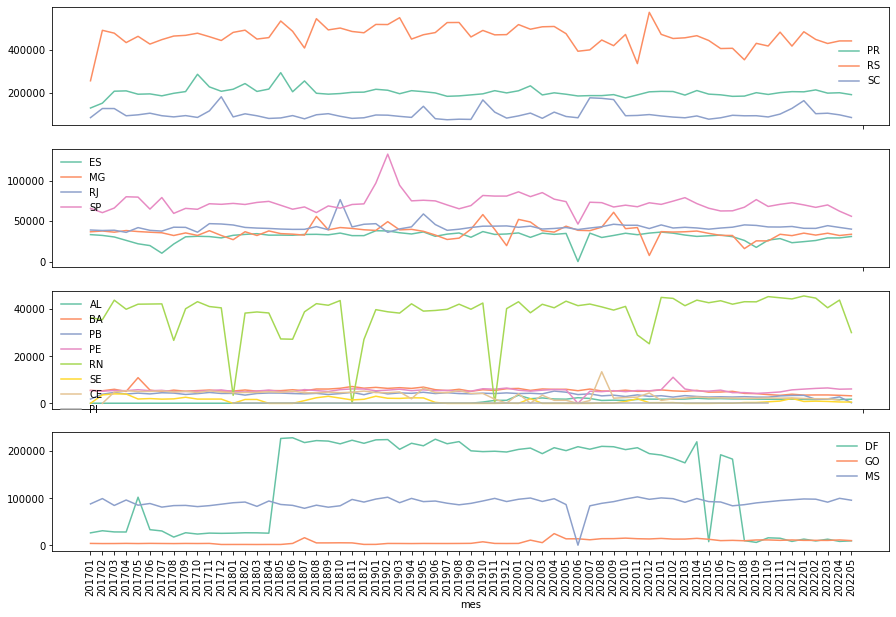

In [71]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

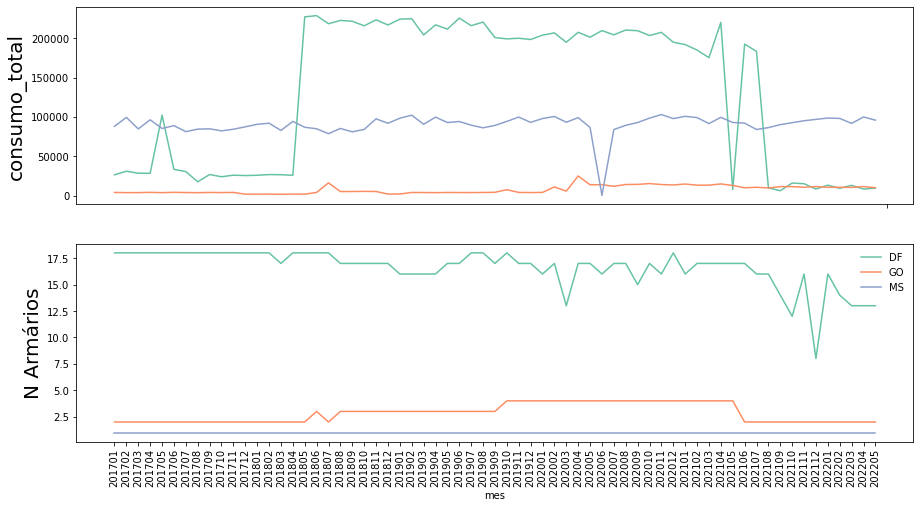

In [28]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))


plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("consumo_total")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

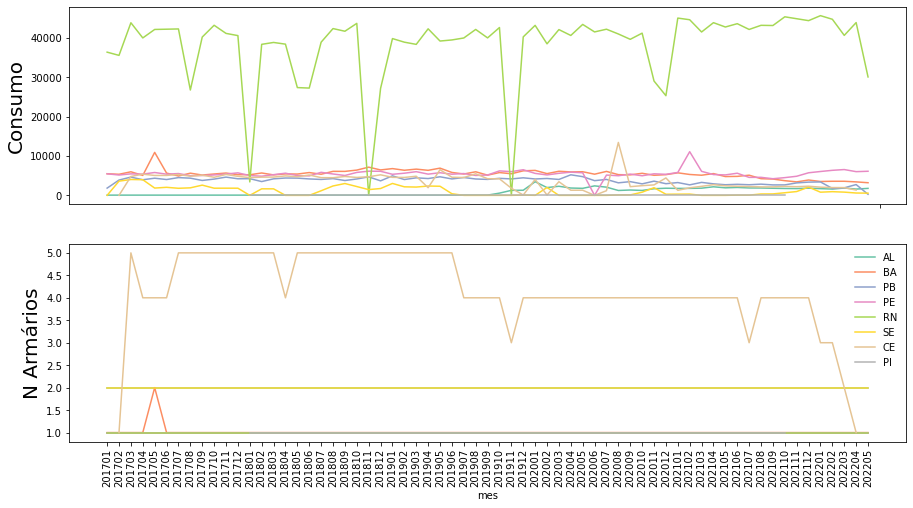

In [29]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

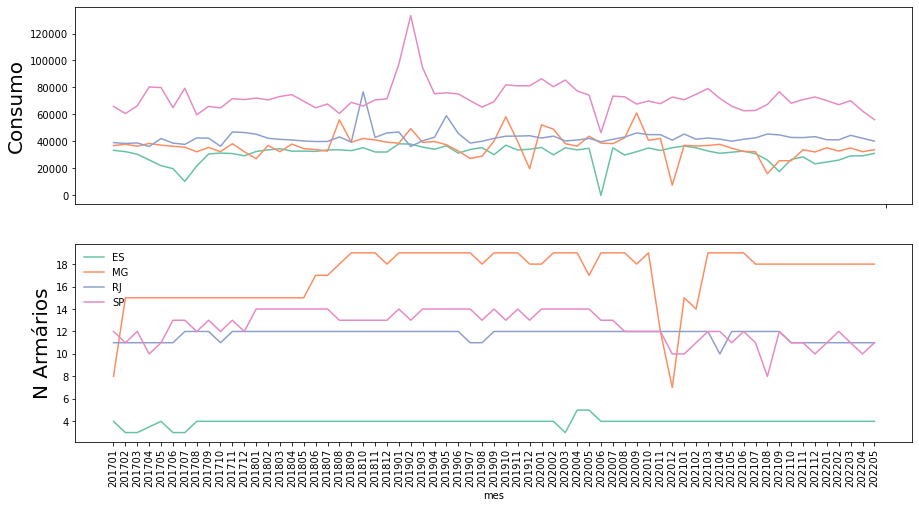

In [30]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

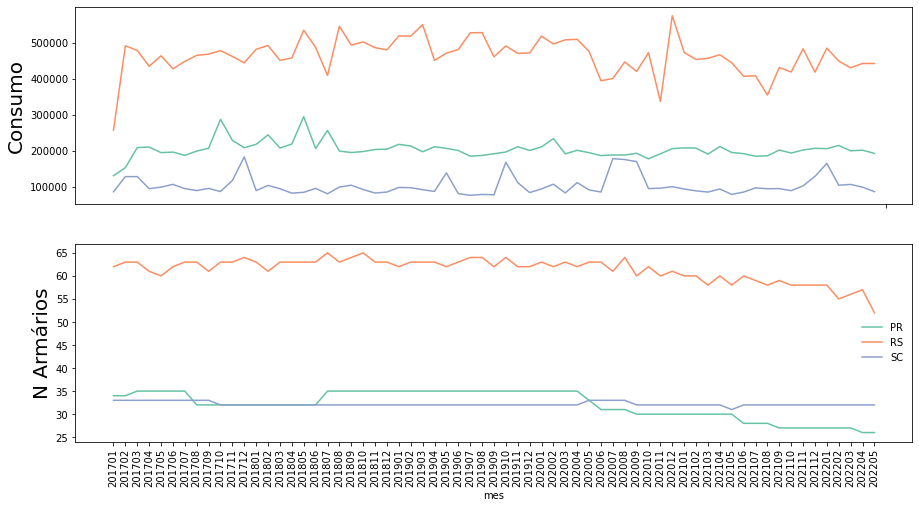

In [31]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

plot = plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Consumo")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)


plot = plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("N Armários")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()

In [62]:
df = pd.read_csv(PATH_NOVO + 'sempre_outliers.txt', sep = '\t')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

,contagem,mes,uf,macroregiao,consumototal,valortotal
0,1,2017-01-01,DF,CO,0.00,84.90
1,1,2017-01-01,RO,N,100.00,65.68
2,1,2017-01-01,PE,NE,5466.00,3561.18
3,8,2017-01-01,PR,S,84063.00,49428.36
4,11,2017-01-01,RS,S,116205.00,73953.29
...,...,...,...,...,...,...
790,6,2022-05-01,SC,S,19679.00,15802.16
791,3,2022-05-01,ES,SE,21952.00,19960.16
792,4,2022-05-01,MG,SE,0.00,141.53
793,7,2022-05-01,RJ,SE,20357.00,24923.91


In [63]:
group = pd.DataFrame(df.groupby('mes')['contagem'].sum())
group.reset_index(inplace=True)
group['mes']

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
        ...    
60   2022-01-01
61   2022-02-01
62   2022-03-01
63   2022-04-01
64   2022-05-01
Name: mes, Length: 65, dtype: datetime64[ns]

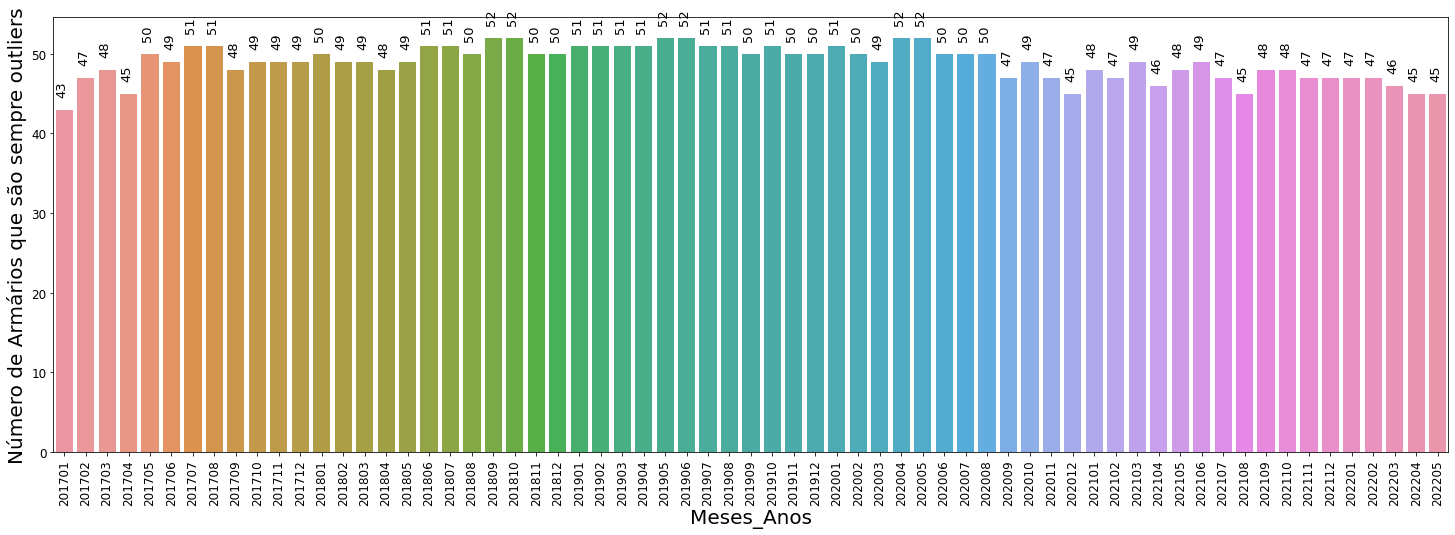

In [64]:
plt.figure(figsize=(25, 8))

ax = sns.barplot(x = group['mes'].dt.strftime('%Y%m'), y = 'contagem', data = group)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários que são sempre outliers')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

<Figure size 432x288 with 0 Axes>

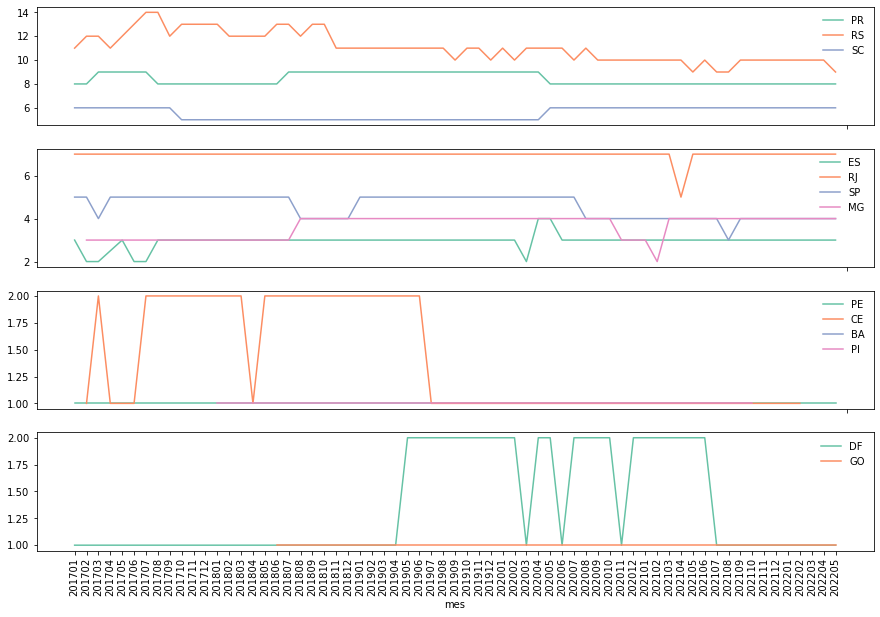

In [65]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="contagem", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


<Figure size 432x288 with 0 Axes>

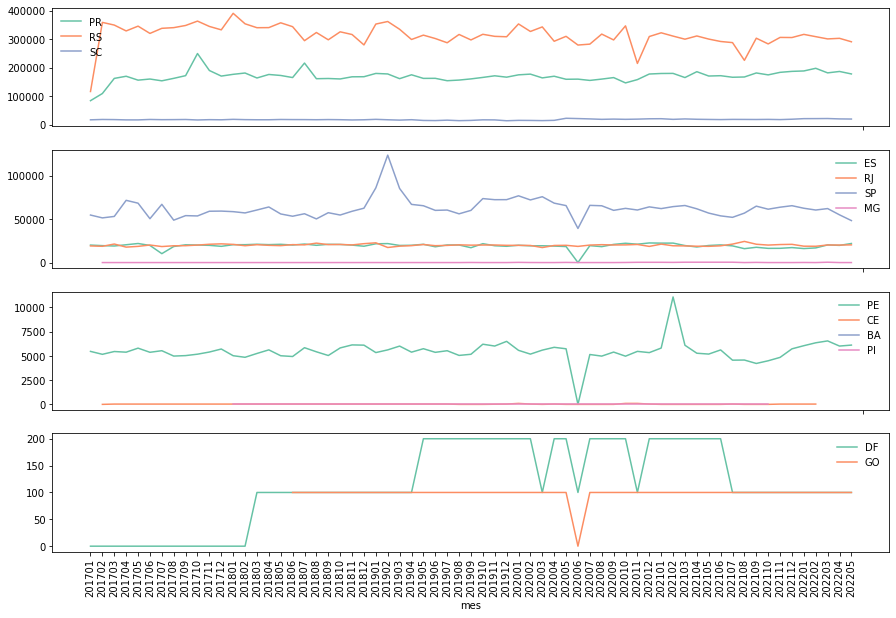

In [66]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,10))


plot = plt.subplot(4, 1, 1)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='S'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='S'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 2)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='SE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='SE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)


plot = plt.subplot(4, 1, 3)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='NE'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='NE'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("")
plt.xticks("")
ax.yaxis.label.set_size(20)
#plt.show()
plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)



plot = plt.subplot(4, 1, 4)
ax = sns.lineplot(data=df.loc[df['macroregiao']=='CO'], x=df['mes'].dt.strftime('%Y%m').loc[df['macroregiao']=='CO'], y="consumototal", hue = 'uf', palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("")
ax.yaxis.label.set_size(20)

plt.legend()
leg = plt.legend(loc = 0, ncol = 1, shadow = False, fancybox = True, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)
plt.grid(False)
plt.show()


In [13]:
df = pd.read_csv(PATH_NOVO + 'clientes_por_armario.txt', sep = '\t')
df = df.sort_values(by = 'count_x_seq')
df['Estado'] = ['RS', 'PR', 'PR', 'SC', 'RS', 'RS', 'SP', 'RS', 'MG', 'SC', 'MG', 'SP', 'PR', 'CE', 'PR', 'RJ', 'RS', 'ES', 'MG']
df = df.sort_values(by = ['Estado', 'count_x_seq'])
df

,count_x_seq,count_instancia_rpon,count_prod_id,armarios,sigladosite,Estado
2,231,613,1519,CEFLA_O1A78,G44,CE
7,500,1482,3759,ESSEA_O1A01,V87,ES
3,193,529,1169,MGGVS_O1A23,K62,MG
10,198,637,1765,MGBHE_O1A05,Z45,MG
1,528,1584,4032,MGCEM_O1A12,G34,MG
0,90,289,846,PRCTA_O1A87,G27,PR
9,109,331,780,PRCTA_O1A08,Z12,PR
15,205,628,1673,PRCTA_O1B21,T94,PR
11,275,823,2204,PRCTA_O1A31,G35,PR
17,290,902,2348,RJNRI_O1A06,Z75,RJ


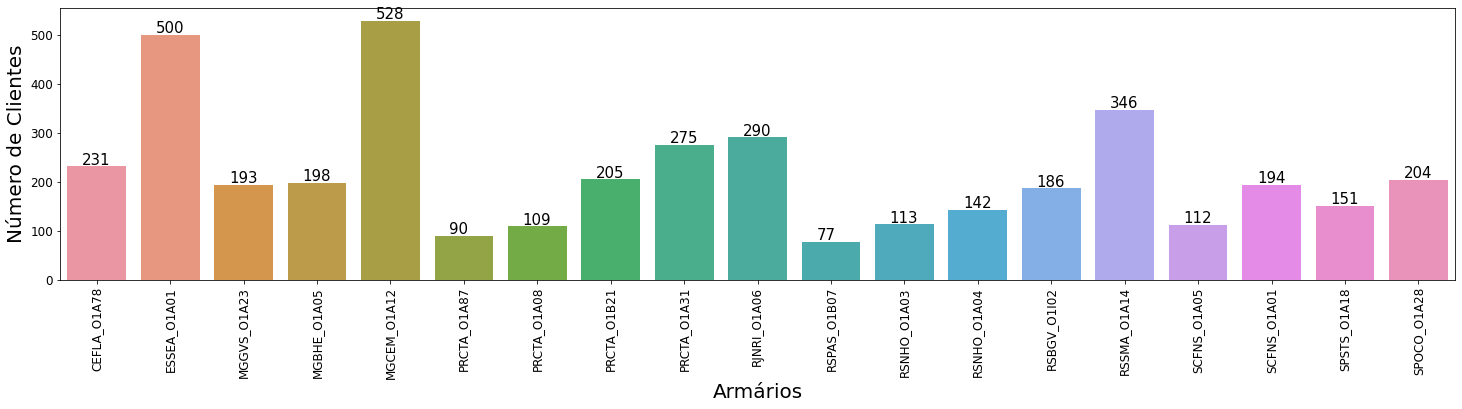

In [19]:
plt.figure(figsize=(25, 5))

ax = sns.barplot(x = 'armarios', y = 'count_x_seq', data = df)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 4), fontsize = 15)
    
ax.set(xlabel='Armários', ylabel='Número de Clientes')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()